In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [23]:

print(os.getcwd())

/workspaces/Template-Bootcamp/notebooks


In [24]:
df_0 = pd.read_csv('/workspaces/Template-Bootcamp/data/telco_churn_data.csv')
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [26]:
import sweetviz as sv

In [27]:
# # Analyzing the dataset
# advert_report = sv.analyze(df_0)
# advert_report.show_html('EDA_BD_inicial_churn.html')

Presentamos las dimensiones del Dataframe para darnos una idea de la cantidad de datos con los que vamos a trabajar:

In [28]:
# Dimensiones del Dataframe
df_0.shape

(7043, 46)

Identificamos que tenemos 7043 observaciones con 46 variables.

Vamos a validar la cantidad de nulos por variable:

In [29]:
np.sum(df_0.isnull(), axis = 0)

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [30]:
# Cantidad de valores únicos por variable
df_0.nunique()

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2298
Total Regular Charges             

In [31]:
# Tipos de variables
df_0.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

In [32]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [33]:
# Conteo de la variable 'Churn Value'
print(df_0["Churn Value"].value_counts())
print(df_0["Churn Value"].value_counts(10))

Churn Value
0    5174
1    1869
Name: count, dtype: int64
Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [34]:
df_0['Customer Satisfaction'].value_counts().sort_index()

Customer Satisfaction
1.0    332
2.0    200
3.0    675
4.0    380
5.0    247
Name: count, dtype: int64

In [35]:
# Reemplazar valores nulos en columnas de tipo objeto con una cadena vacía
columns_to_fill_with_empty_string = ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']
df_0[columns_to_fill_with_empty_string] = df_0[columns_to_fill_with_empty_string].fillna('')

# Reemplazar valores nulos en 'Customer Satisfaction' con -1
df_0['Customer Satisfaction'] = df_0['Customer Satisfaction'].fillna(-1)

# Verificar que ya no hay valores nulos
print(df_0.isnull().sum())

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

In [36]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,-1.0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,-1.0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,-1.0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


## **Regresión logística**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Identificar características numéricas y categóricas
num_features = df_0.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df_0.select_dtypes(include=['object']).columns.tolist()

In [39]:
# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_0[col] = le.fit_transform(df_0[col].astype(str))
    label_encoders[col] = le

In [40]:
df_0.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,6207,0,0,1,0,0,0.00,0,1,3,9,0,0,1,0,0,1,0,0,0,1,0,41.236,39.65,0.00,0.0,0.00,1,78,0,1,0,0,0,554,90022,34.023810,-118.156582,68701,1,5433,2,6,5,0,-1.0
1,5305,1,1,8,5,1,48.85,1,1,1,19,0,1,0,0,0,0,0,0,0,1,1,83.876,633.30,0.00,120.0,390.80,0,74,0,1,1,1,1,554,90063,34.044271,-118.185237,55668,1,5302,2,4,5,0,-1.0
2,1129,0,0,18,4,1,11.33,1,1,3,57,0,0,0,0,1,1,1,1,0,1,0,99.268,1752.55,45.61,0.0,203.94,1,71,0,1,0,1,3,554,90065,34.108833,-118.229715,47534,1,3179,2,4,1,0,-1.0
3,3208,1,1,25,3,1,19.76,0,1,3,13,0,1,1,0,1,1,0,0,0,1,0,102.440,2514.50,13.43,327.0,494.00,0,78,0,1,1,1,1,448,90303,33.936291,-118.332639,27778,1,5337,3,12,1,1,2.0
4,3419,1,1,37,3,1,6.33,1,1,1,15,0,0,0,0,0,0,0,0,0,1,0,79.560,2868.15,0.00,430.0,234.21,0,80,0,1,1,1,1,1072,90602,33.972119,-118.020188,26265,1,2793,5,9,1,0,2.0


In [57]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason', 'Customer ID',
                       'Avg Monthly Long Distance Charges','CLTV','Number of Dependents','Under 30',
                       'Total Regular Charges','Total Extra Data Charges','Total Long Distance Charges','Gender',
                       'Payment Method','Device Protection Plan','Streaming Music','Total Refunds'])  # Eliminamos 'Customer ID' y 'Churn Value' ya que no son características
y = df_0['Churn Value']

In [58]:
# print(result.summary())

In [59]:
# Actualizar num_features y cat_features después de eliminar 'Churn Value'
num_features = [col for col in num_features if col in X.columns]
cat_features = [col for col in cat_features if col in X.columns]

In [60]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [61]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalizar características numéricas
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [62]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [63]:
# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [64]:
# Métricas en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

print('Train Accuracy:', train_accuracy)
print('Train AUC:', train_auc)
print('Train Classification Report:\n', train_report)

Train Accuracy: 0.9140930067447639
Train AUC: 0.9631697631123617
Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4131
           1       0.87      0.80      0.83      1503

    accuracy                           0.91      5634
   macro avg       0.90      0.88      0.89      5634
weighted avg       0.91      0.91      0.91      5634



In [65]:
# Métricas en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba)
test_report = classification_report(y_test, y_pred)

print('Test Accuracy:', test_accuracy)
print('Test AUC:', test_auc)
print('Test Classification Report:\n', test_report)

Test Accuracy: 0.9070262597586941
Test AUC: 0.9589325663151166
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1043
           1       0.84      0.79      0.82       366

    accuracy                           0.91      1409
   macro avg       0.89      0.87      0.88      1409
weighted avg       0.91      0.91      0.91      1409



In [66]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [67]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.209081
         Iterations 9


In [68]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7012
Method:                           MLE   Df Model:                           30
Date:                Tue, 06 Aug 2024   Pseudo R-squ.:                  0.6386
Time:                        21:21:16   Log-Likelihood:                -1472.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -15.4975      6.219     -2.492      0.013     -27.686      -3.309
Referred a Friend                   1.4706      0.326      4.517    

In [64]:
# # Importancia de características
# importance = model.coef_[0]
# features = X.columns
# feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.show()

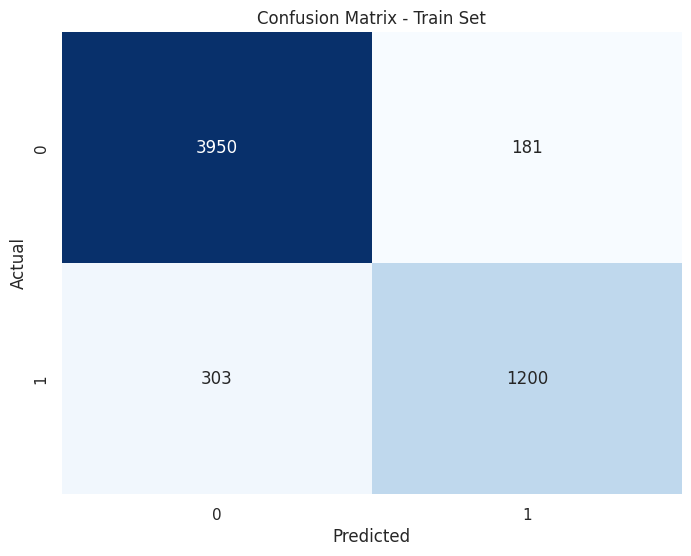

In [69]:
# Matriz de confusión en el conjunto de entrenamiento
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

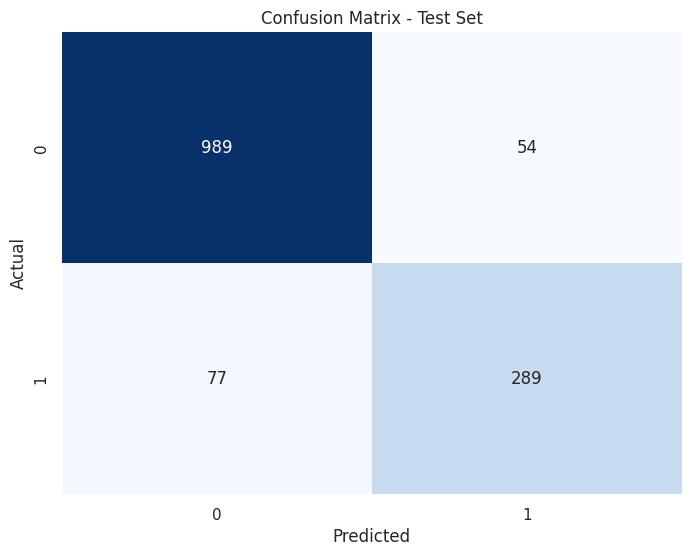

In [70]:
# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
X_train.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Monthly Charge,Total Refunds,Age,Senior Citizen,Married,Dependents,City,Zip Code,Latitude,Longitude,Population,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
6924,1,-0.311605,0.471554,0,1,0,1,1,0.125696,0,1,1,1,0,0,0,1,0,1,-0.120627,-0.24616,-0.321828,0,1,1,187,-0.958130,-0.915530,0.944866,2.136289,-0.243715,-0.426397,2.124068
5249,1,0.688157,0.471554,0,1,0,1,1,1.450004,0,1,0,1,0,0,0,1,0,1,-0.349897,-0.24616,0.694461,0,1,1,857,0.335392,0.646783,-1.237497,0.340416,0.450466,-0.426397,-0.556591
5852,1,2.687679,-0.667978,0,1,0,1,2,0.409477,1,1,0,1,0,1,1,1,2,0,0.087354,-0.24616,-0.859864,0,1,1,718,-1.162456,-0.788257,0.621403,3.590073,-0.937895,-0.426397,-0.556591
3597,0,-0.644858,-0.952861,5,1,1,1,3,-0.631051,0,0,0,0,0,0,0,1,0,1,0.369028,-0.24616,0.275989,0,0,0,554,-1.873812,-0.876304,0.693482,-0.318743,1.144646,-0.426397,-0.556591
4147,1,2.687679,0.797135,0,1,0,0,0,-1.009424,0,0,0,0,0,0,0,0,2,0,-1.519172,-0.24616,-1.637027,0,1,1,384,0.240797,0.023425,-0.757365,-0.363264,-0.937895,-0.426397,-0.556591
